HR-Employee DATA-Attrition

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [34]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [37]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

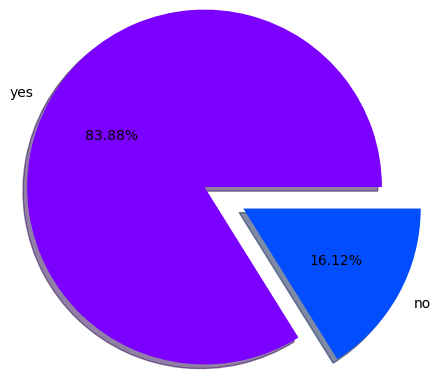

In [38]:
labels='yes','no'
fig,ax=plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels=labels,radius=1.2,autopct='%2.2f%%',explode=[0.1,0.2],shadow=True)
plt.show()

In [39]:
category=df.select_dtypes(include='object')
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
MaritalStatus
Married     673
Single 

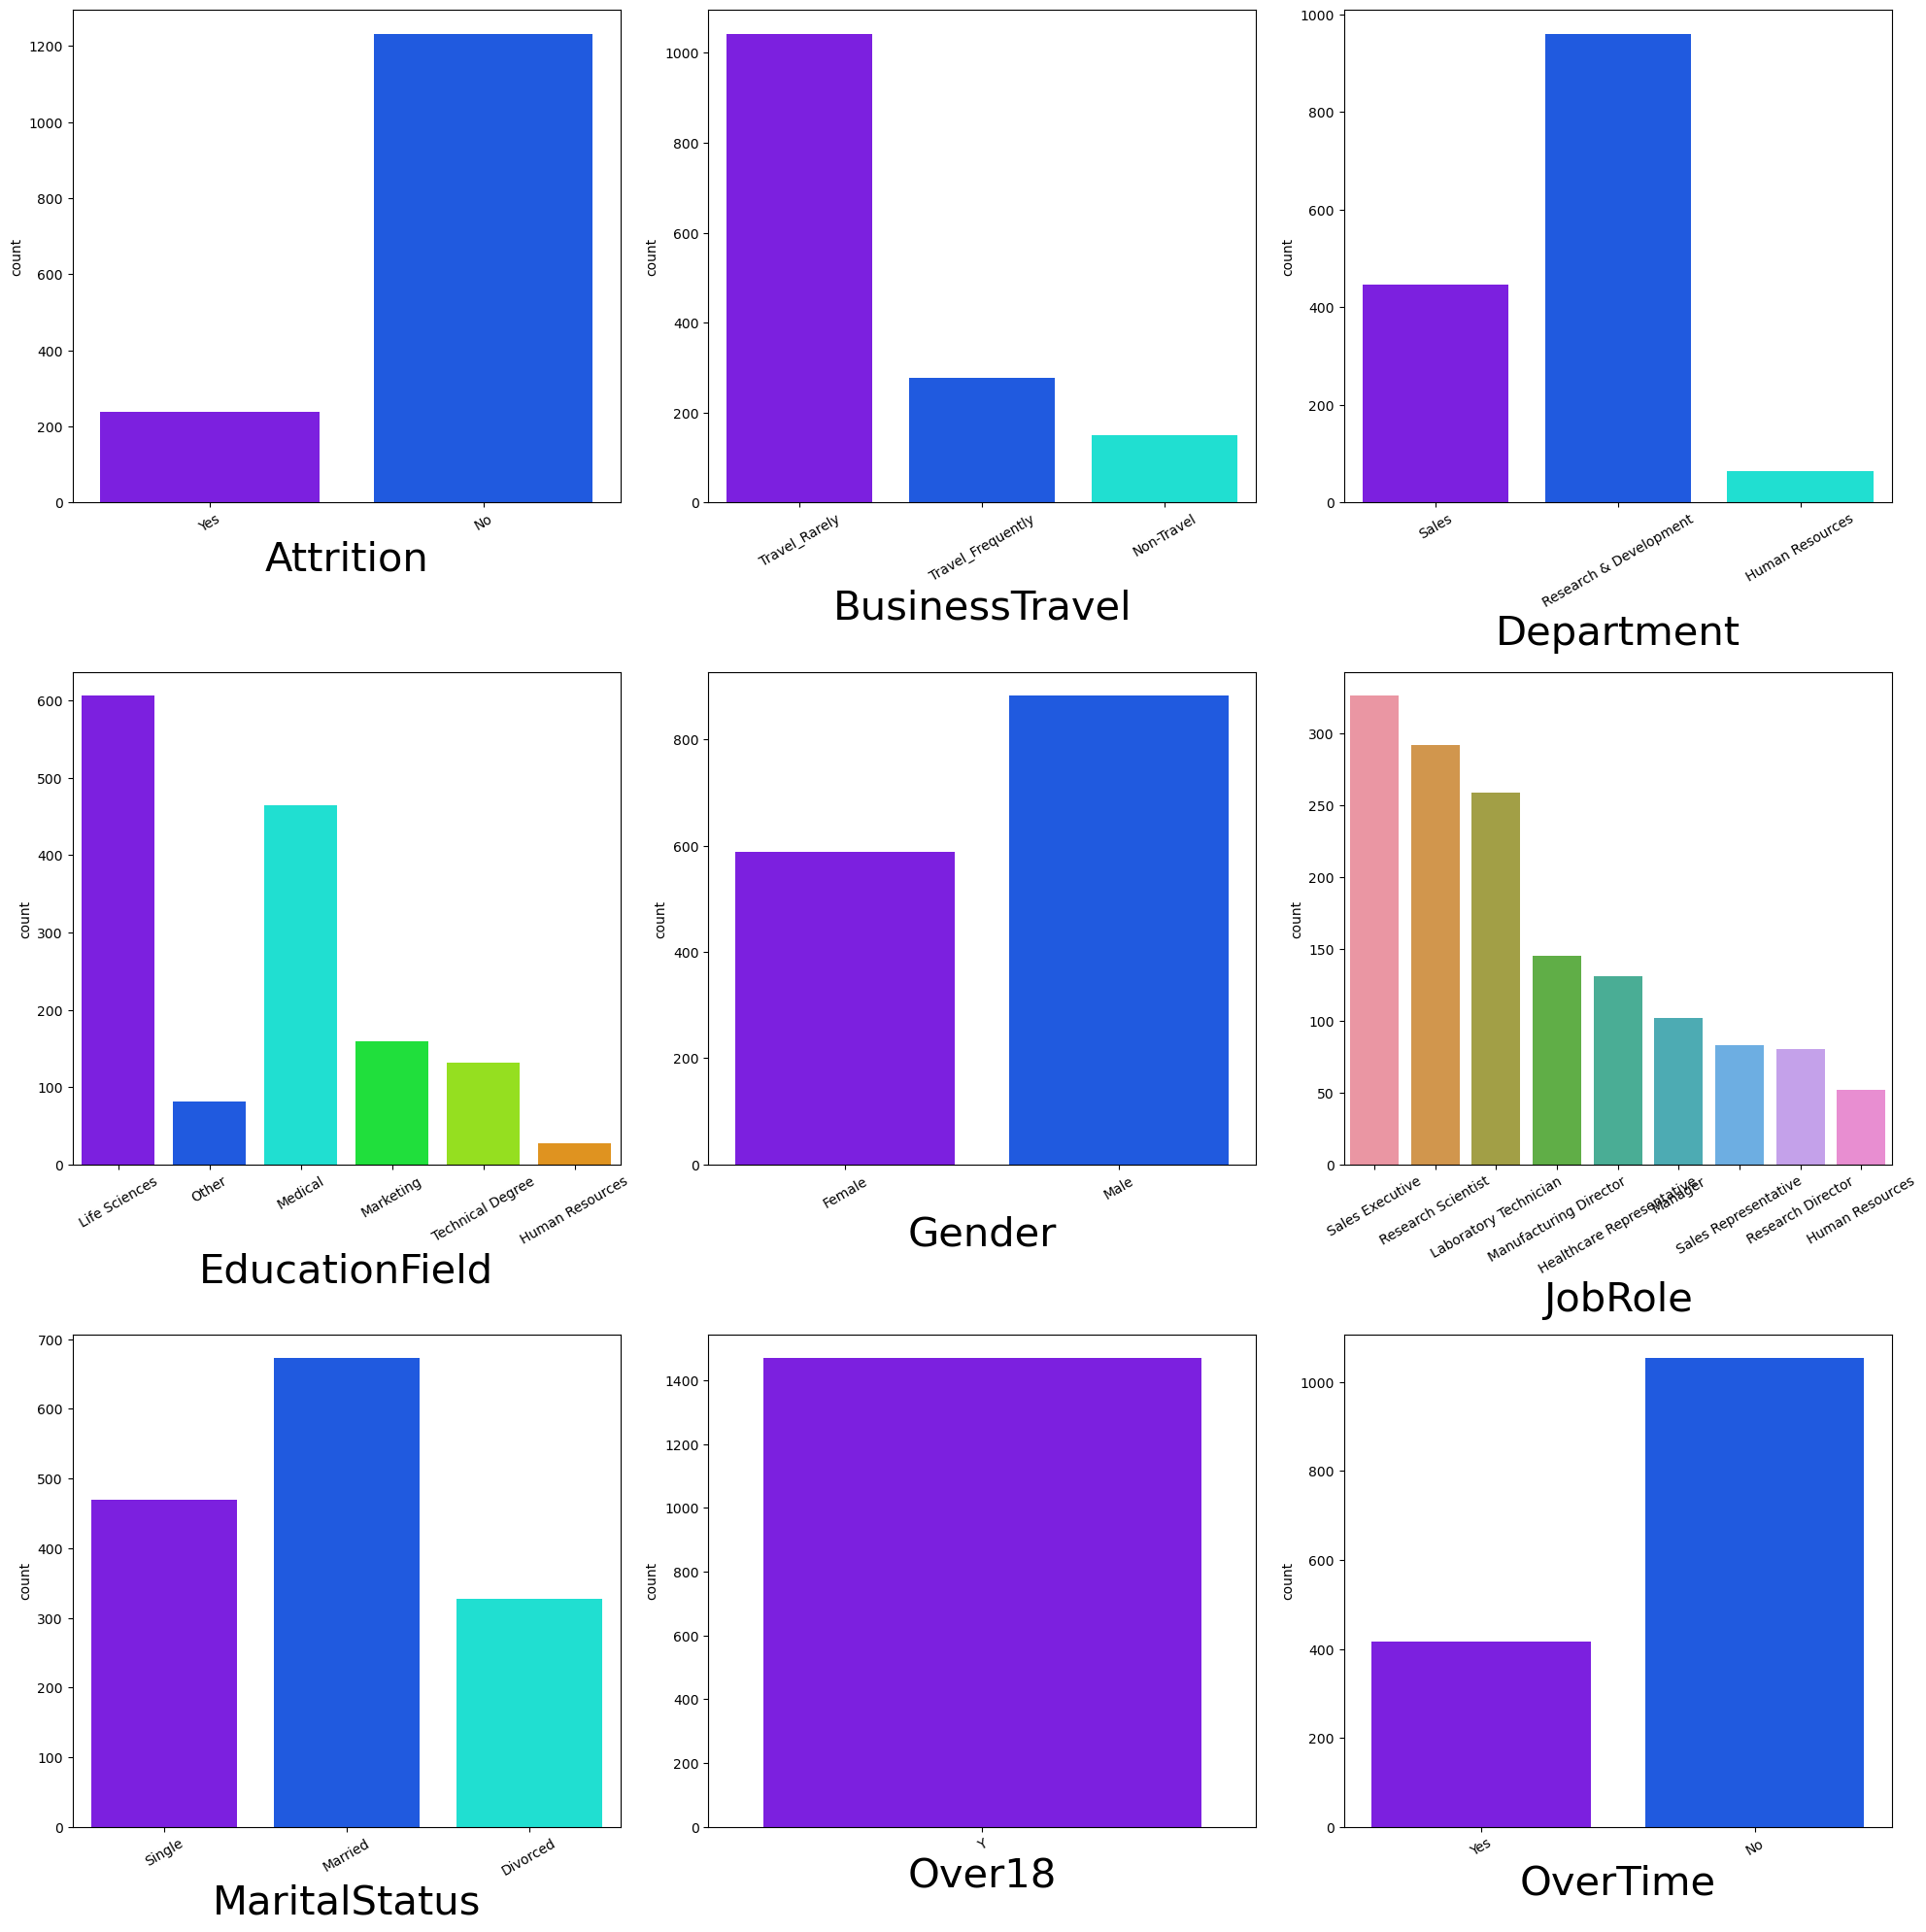

In [40]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=30)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
ordinal=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']

for i in ordinal:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


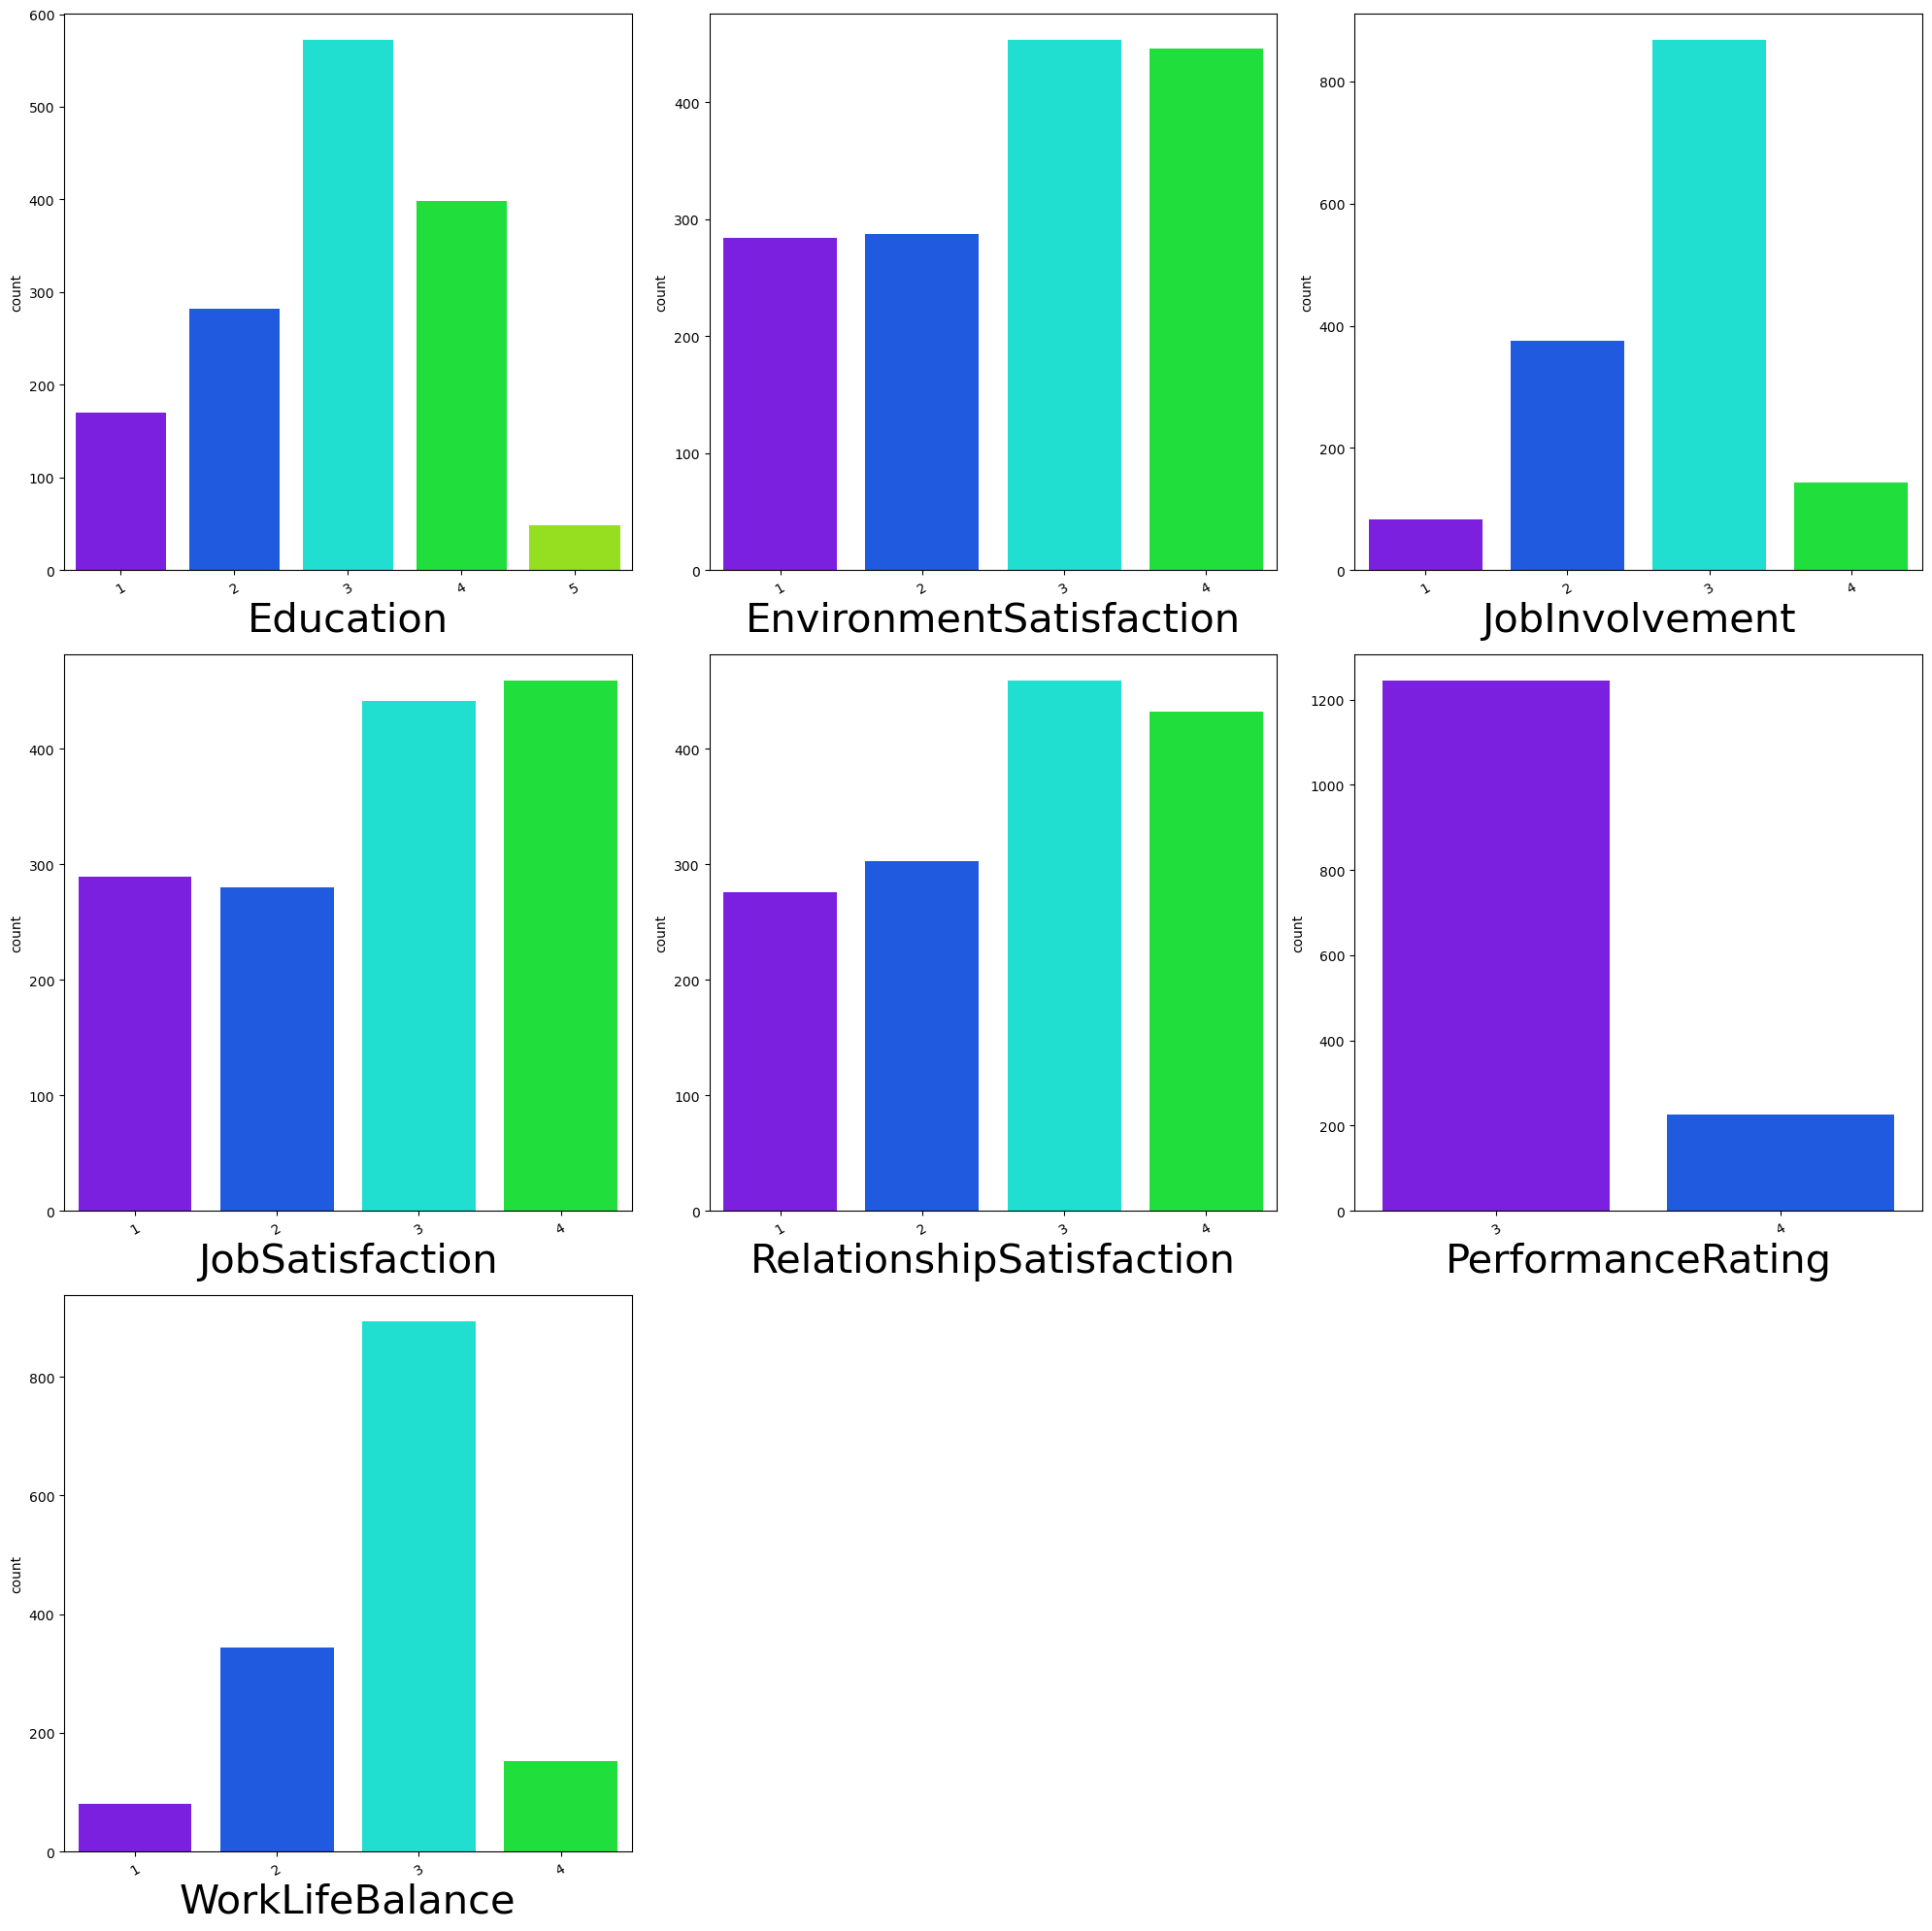

In [43]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
ordinal=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in ordinal:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=30)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

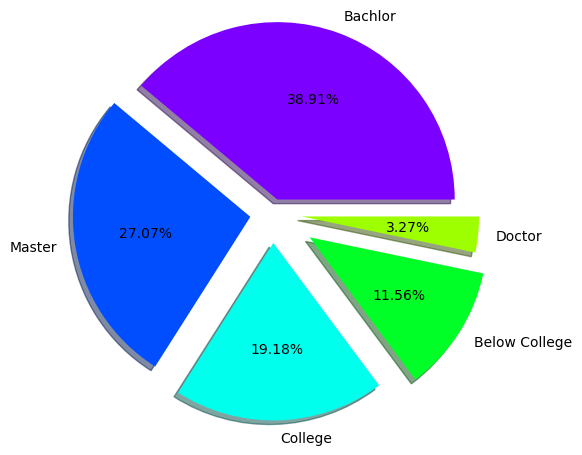

In [44]:
labels='Bachlor','Master','College','Below College','Doctor'
fig,ax=plt.subplots()
ax.pie(df['Education'].value_counts(),labels=labels,radius=1.2,autopct='%3.2f%%',explode=[0.1,0.15,0.2,0.3,0.2],shadow=True)
plt.show()

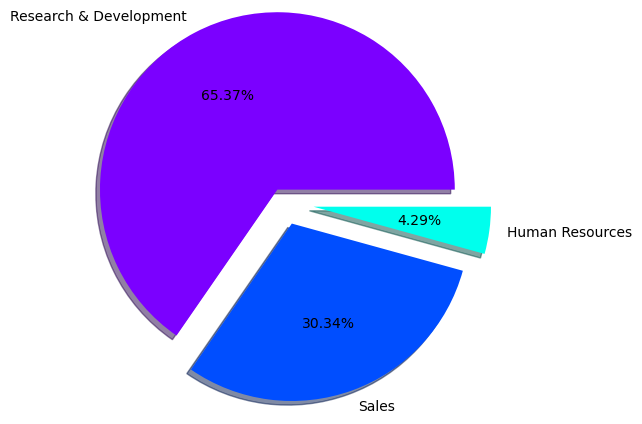

In [45]:
labels='Research & Development','Sales','Human Resources'
fig,ax=plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels,radius=1.2,autopct='%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [46]:
pd.crosstab([df.Education],[df.Department],margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


In [47]:
pd.crosstab([df.Education],[df.Department,df.Attrition],margins=True).style.background_gradient(cmap='summer_r')

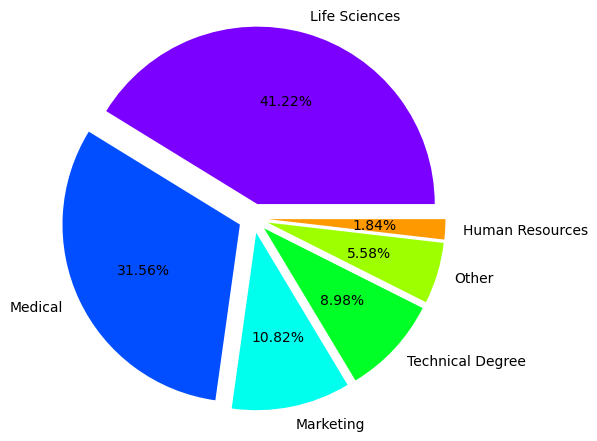

In [48]:
fig,ax=plt.subplots()
ax.pie(df.EducationField.value_counts(),labels=df.EducationField.value_counts().index,radius=1.2,autopct='%3.2f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

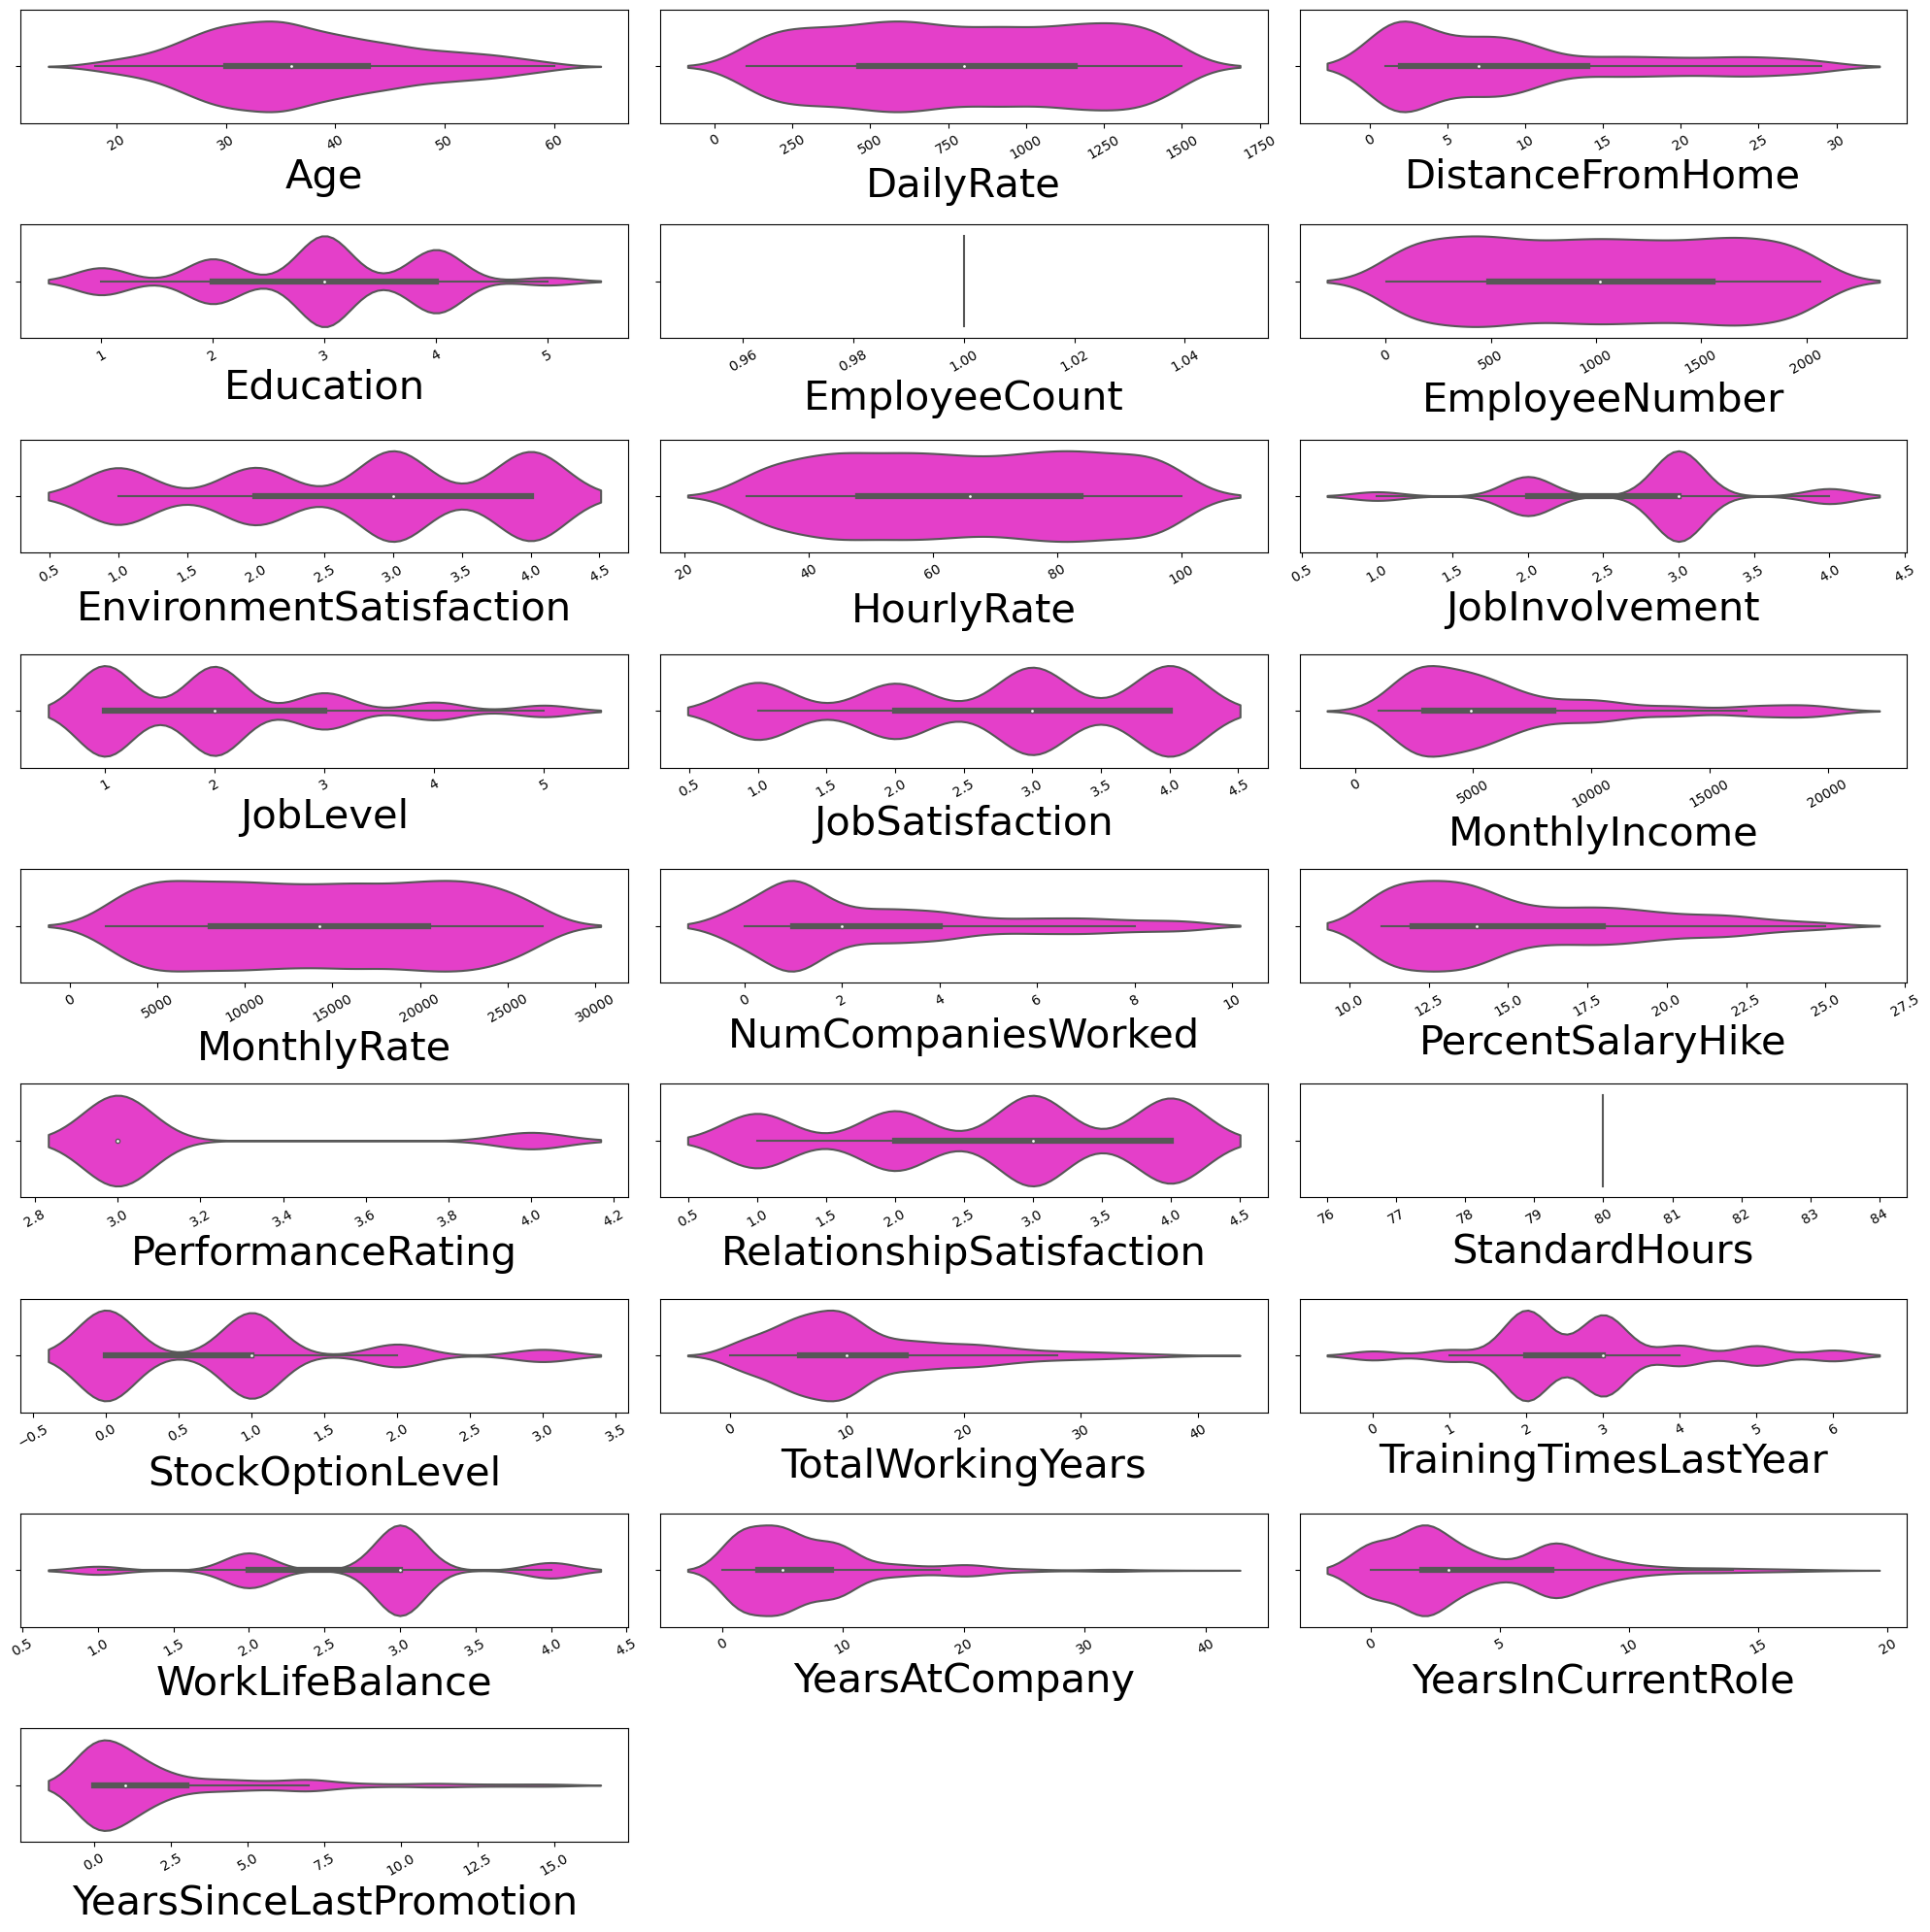

In [49]:
sns.set_palette('spring')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
numeric_int=df.select_dtypes(exclude='object')
for i in numeric_int:
    if plotnumber<=25:
        ax=plt.subplot(9,3,plotnumber)
        sns.violinplot(x=df[i])
        plt.xlabel(i,fontsize=30)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='count'>

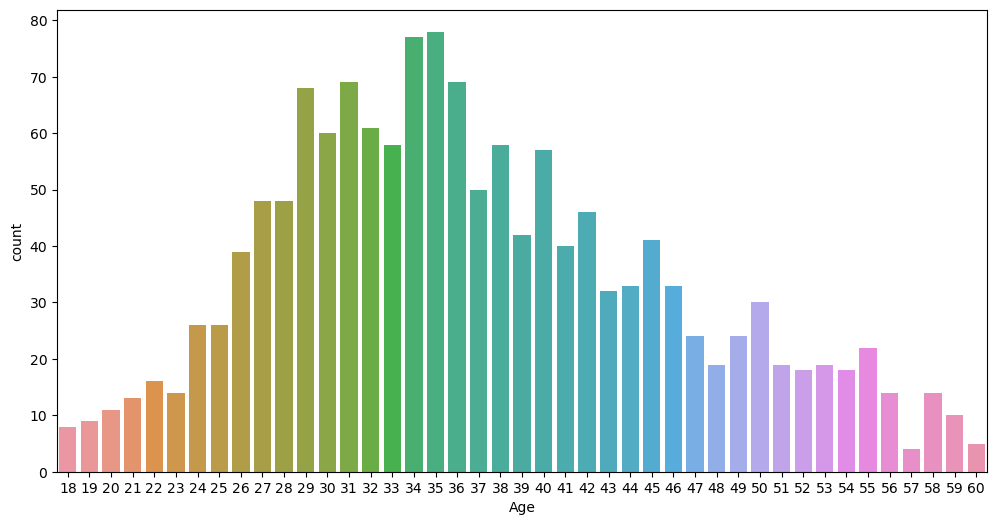

In [51]:
plt.subplots(figsize=(12,6))
sns.countplot(x=df.Age)

<Axes: xlabel='Age', ylabel='count'>

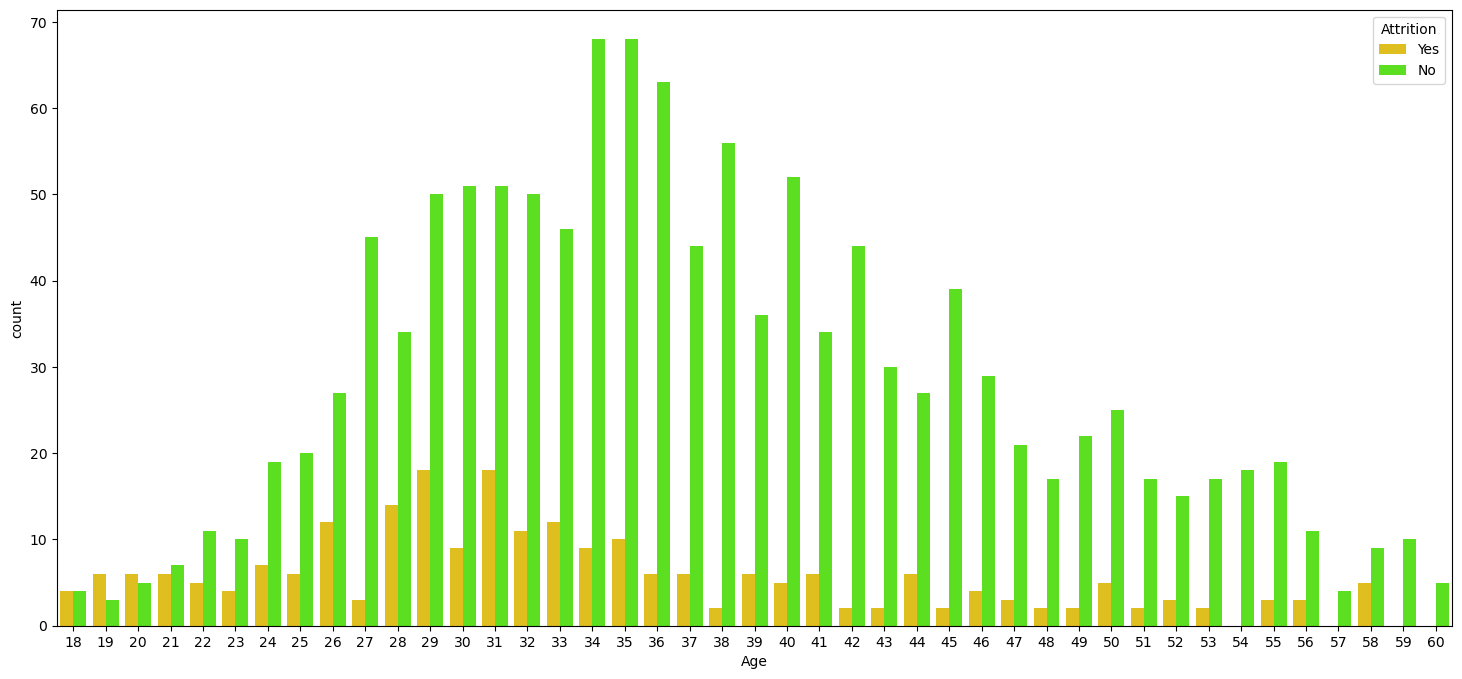

In [52]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age',hue='Attrition',data=df)

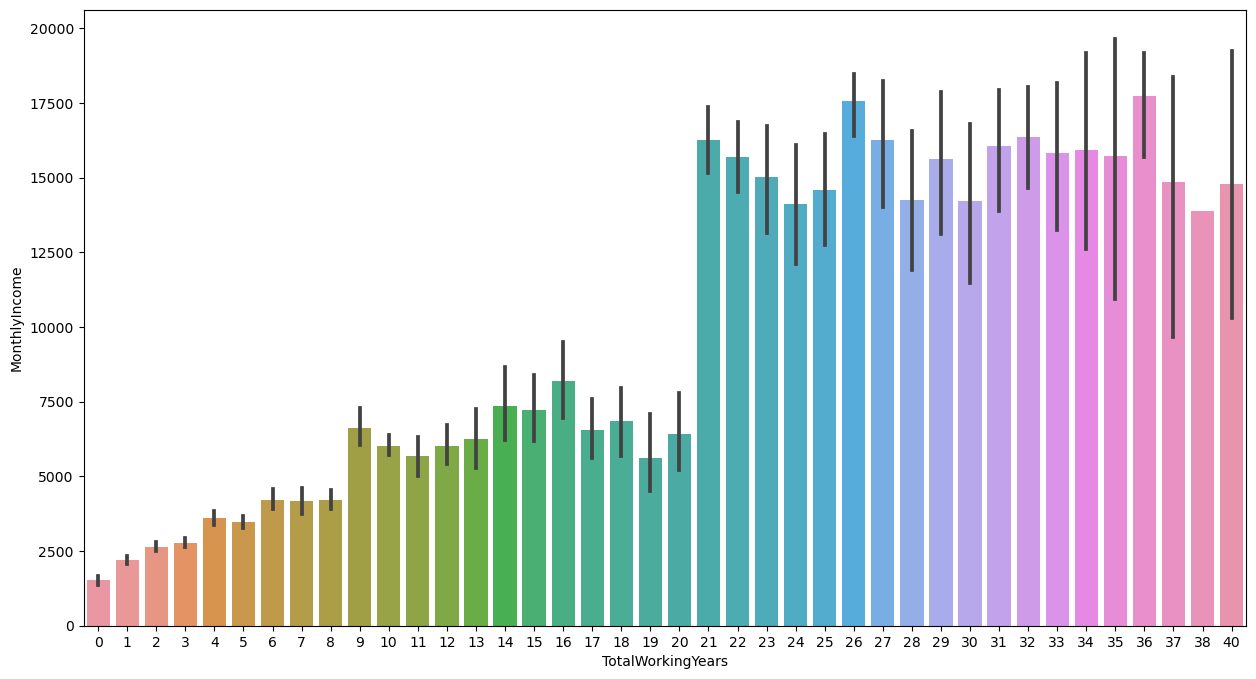

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['TotalWorkingYears'],y=df['MonthlyIncome'])
plt.show()

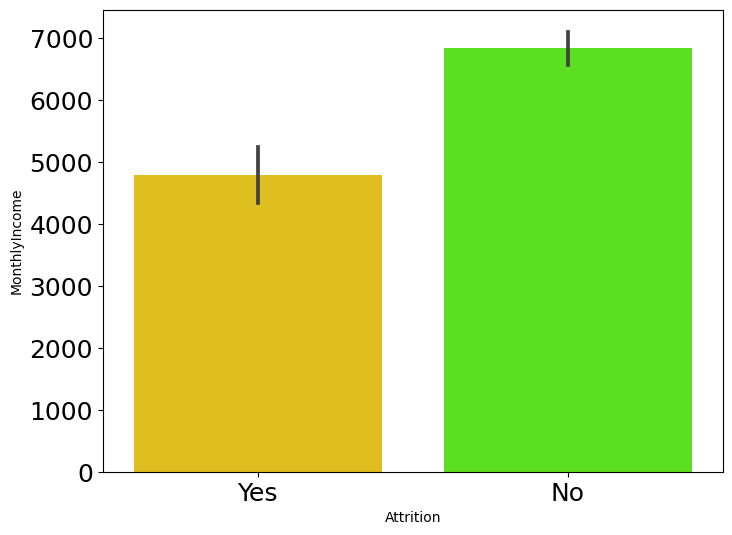

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()